In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("ggplot")
%matplotlib inline

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

import geopandas as gpd
from shapely.geometry import Point, Polygon



In [171]:
data_incidence=pd.read_csv("malaria_incidence_per_1000_pop_at_risk.csv")
data_report=pd.read_csv("malaria_reported_numbers.csv")


In [172]:
mal_inc= data_incidence.copy()
mal_rep=data_report.copy()

## Sanity Data CHeck

In [173]:
mal_rep.shape

(1944, 5)

In [174]:
mal_rep.duplicated().sum()

0

In [175]:
mal_rep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1944 non-null   object 
 1   Year           1944 non-null   int64  
 2   No. of cases   1710 non-null   float64
 3   No. of deaths  1675 non-null   float64
 4   WHO Region     1944 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 76.1+ KB


In [176]:
mal_rep.isnull().sum()

Country            0
Year               0
No. of cases     234
No. of deaths    269
WHO Region         0
dtype: int64

In [180]:
mal_rep.head(3)

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa


In [181]:
mal_rep.select_dtypes(include="number")

,Year,No. of cases,No. of deaths
0,2017,161778.0,10.0
1,2017,0.0,0.0
2,2017,3874892.0,13967.0
3,2017,0.0,1.0
4,2017,0.0,NaN
...,...,...,...
1939,2000,29736.0,24.0
1940,2000,74316.0,142.0
1941,2000,1394495.0,NaN
1942,2000,NaN,NaN


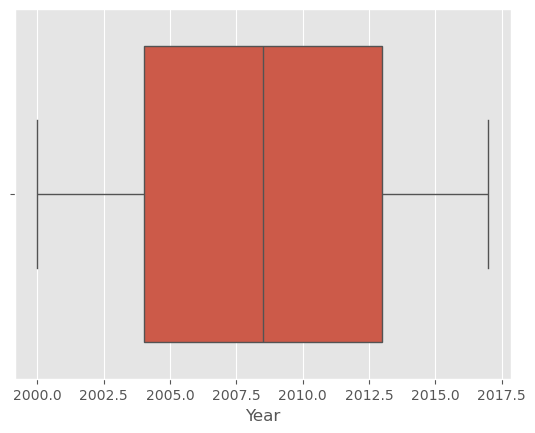

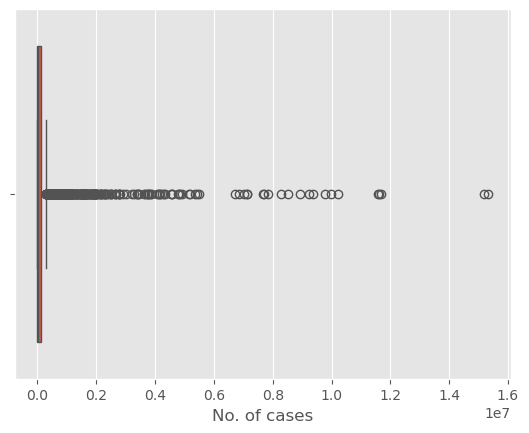

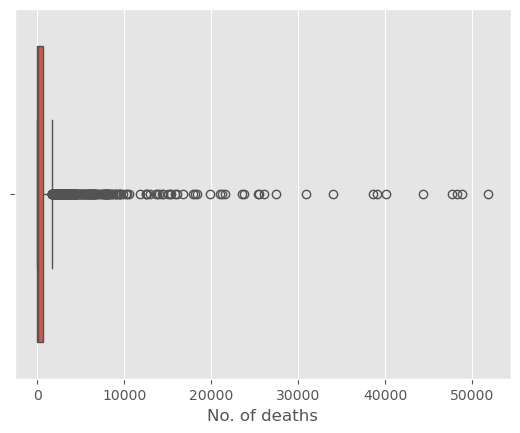

In [182]:
for column in mal_rep.select_dtypes(include="number").columns:
    sns.boxplot(mal_rep,x=column)
    plt.show()

#### Insight:
- The dataset contains 1,944 observations and 5 columns. There are missing values in the **No. of Deaths** and **No. of Cases** columns. No duplicates were found. There are also outliers in the **No. of Deaths** and **No. of Cases** columns.

## Data Exploration

In [119]:
num=mal_rep.select_dtypes(include="number")
obj= mal_rep.select_dtypes(include="object")

In [120]:
mal_rep.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1944.0,2008.500000,5.189462e+00,2000.0,2004.00,2008.5,2013.00,2017.0
No. of cases,1710.0,389730.251462,1.270270e+06,0.0,593.75,14792.0,117097.75,15330841.0
No. of deaths,1675.0,1289.413731,4.290740e+03,0.0,1.00,30.0,669.50,51842.0


In [121]:
obj.describe().T

,count,unique,top,freq
Country,1944,108,Afghanistan,18
WHO Region,1944,6,Africa,792


<function matplotlib.pyplot.show(close=None, block=None)>

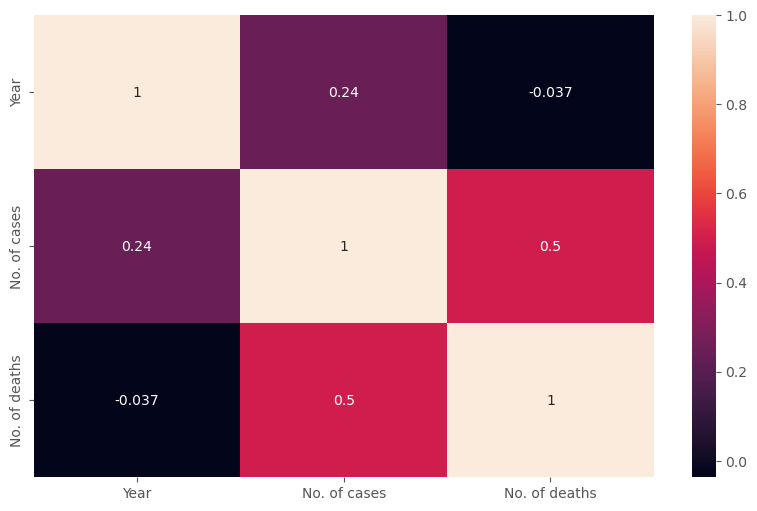

In [122]:
plt.figure(figsize=(10,6))
sns.heatmap(num.corr(),annot=True)
plt.show

<Axes: >

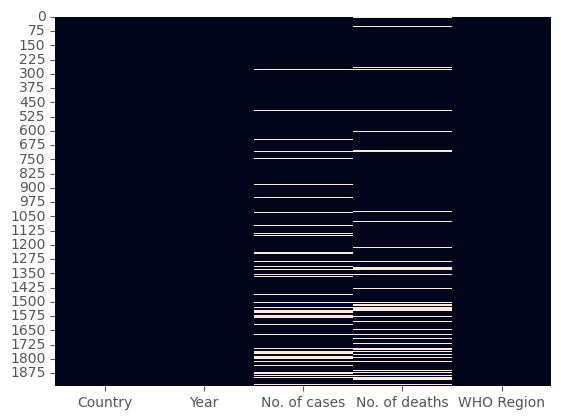

In [123]:
sns.heatmap(mal_rep.isnull(), cbar=False)

<Axes: >

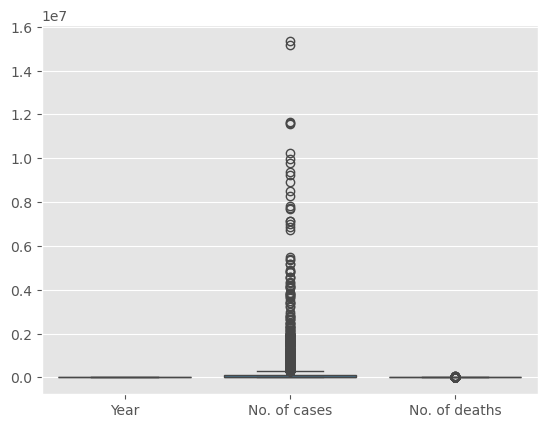

In [124]:
sns.boxplot(data=mal_rep)

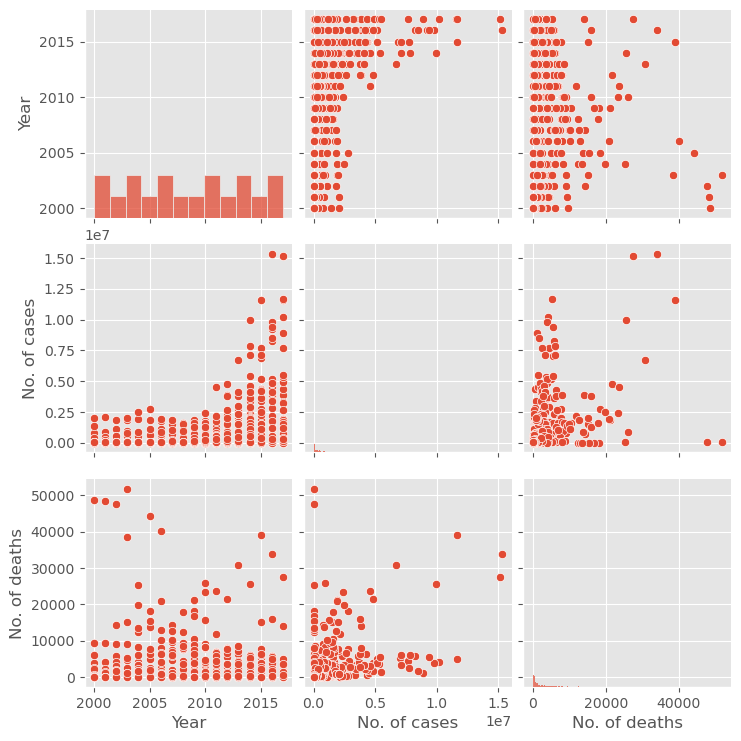

In [125]:
sns.pairplot(mal_rep)

## Data Treatment

### Missing values

In [185]:
#for i in mal_rep.select_dtypes(include="number").columns:
  #  mal_rep[column].fillna( mal_rep[column].median())

In [186]:
mal_rep.dropna(inplace=True)

In [187]:
mal_rep.isnull().sum()

Country          0
Year             0
No. of cases     0
No. of deaths    0
WHO Region       0
dtype: int64

In [188]:
mal_rep.columns

Index(['Country', 'Year', 'No. of cases', 'No. of deaths', 'WHO Region'], dtype='object')

In [189]:
mal_rep.rename(columns={'Country':'country', 'Year':'year', 'No. of cases':'no_of_cases', 'No. of deaths':'no_of_deaths', 'WHO Region':'who_region'},inplace=True)

In [190]:
mal_rep.head(2)

,country,year,no_of_cases,no_of_deaths,who_region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa


In [191]:
mal_rep["country"].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Bangladesh',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Côte d'Ivoire", "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Eritrea', 'Eswatini', 'Ethiopia',
       'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', "Lao People's Democratic Republic",
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mexico',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Pakistan',
       'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
       'Republic of Korea', 'Rwan

In [192]:
mal_rep["country"]=mal_rep["country"].str.replace(r"\s*\(.*?\)",' ',regex=True)

In [193]:
mal_rep["country"].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Bangladesh',
       'Belize', 'Benin', 'Bhutan', 'Bolivia ', 'Botswana', 'Brazil',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Eritrea', 'Eswatini', 'Ethiopia',
       'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran ',
       "Lao People's Democratic Republic", 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mexico', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Pakistan', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
       'Republic of Korea', 'Rwanda', 'Sao Tome and Principe',
       'Saudi A

In [194]:
mal_rep["who_region"].unique()

array(['Eastern Mediterranean', 'Africa', 'Americas', 'South-East Asia',
       'Western Pacific', 'Europe'], dtype=object)

In [195]:
mal_rep["who_region"]=mal_rep["who_region"].str.replace("-"," ",regex=True)

In [196]:
mal_rep["who_region"].unique()

array(['Eastern Mediterranean', 'Africa', 'Americas', 'South East Asia',
       'Western Pacific', 'Europe'], dtype=object)

In [197]:
mal_rep.head(2)

,country,year,no_of_cases,no_of_deaths,who_region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa


In [198]:
mal_rep["no_of_cases"]=mal_rep["no_of_cases"].astype(int)
mal_rep["no_of_deaths"]=mal_rep["no_of_deaths"].astype(int)
mal_rep["no_of_cases"]=mal_rep["no_of_cases"].astype(int)

# Analysis of Data and Visualization

In [147]:
country=mal_rep.groupby("country")[["no_of_cases","no_of_deaths"]].sum().reset_index()
#country.style.background_gradient(cmap='Blues')
country.style.bar(subset=["no_of_cases","no_of_deaths"], align='mid', color=['#d65f5f', '#5fba7d']) 

,country,no_of_cases,no_of_deaths
0,Afghanistan,1045271,363
1,Algeria,1044,4
2,Angola,26006152,125364
3,Argentina,2098,2
4,Armenia,355,0
5,Azerbaijan,4658,0
6,Bangladesh,722954,4252
7,Belize,9196,2
8,Benin,8307559,14790
9,Bhutan,31428,85


In [148]:
import warnings
warnings.filterwarnings("ignore")

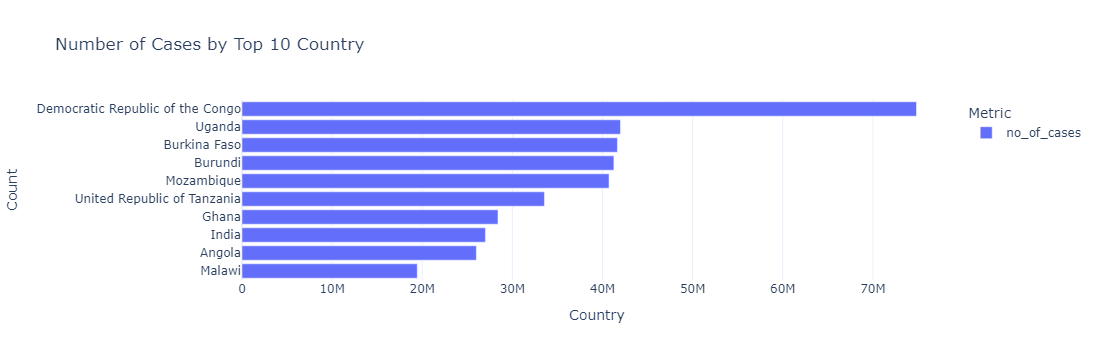

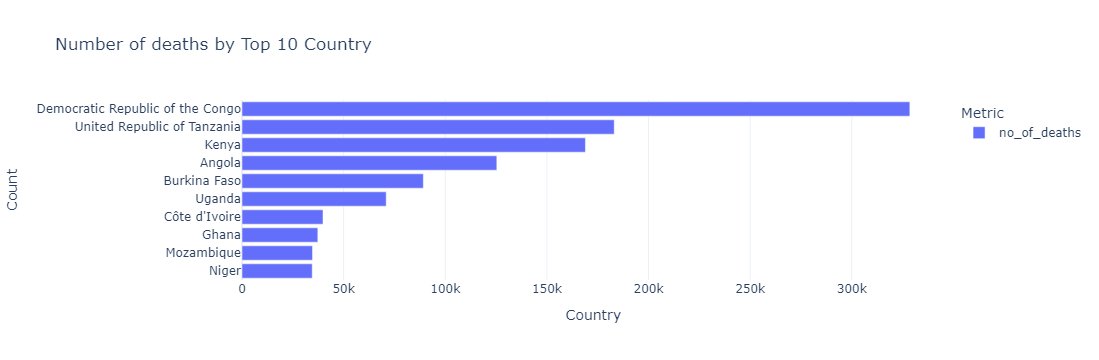

In [199]:
 
fig = px.bar(country.sort_values(ascending=False,by="no_of_cases").head(10)[::-1], y='country', x=['no_of_cases'], 
              labels={'variable':'Metric', 'value':'Count'}, 
              title='Number of Cases by Top 10 Country')

# Update layout for better visibility
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Count",
    legend_title="Metric",
    template="plotly_white"
)

fig.show()



fig = px.bar(country.sort_values(ascending=False,by="no_of_deaths").head(10)[::-1], y='country', x=['no_of_deaths'], 
              labels={'variable':'Metric', 'value':'Count'}, 
              title='Number of deaths by Top 10 Country')

# Update layout for better visibility
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Count",
    legend_title="Metric",
    template="plotly_white"
)

fig.show()

#### Insight:
- The Democratic Republic of Congo has the highest number of confirmed cases and deaths. Uganda follows in confirmed cases, while the United Republic of Tanzania ranks second in deaths.

In [150]:
who_region=mal_rep.groupby("who_region")[["no_of_cases","no_of_deaths"]].sum().reset_index()
who_region.style.highlight_max(color="lightblue")

,who_region,no_of_cases,no_of_deaths
0,Africa,545111852,1480850
1,Americas,13433321,11039
2,Eastern Mediterranean,15841260,26764
3,Europe,112675,25
4,South East Asia,38305249,49802
5,Western Pacific,6709491,18330


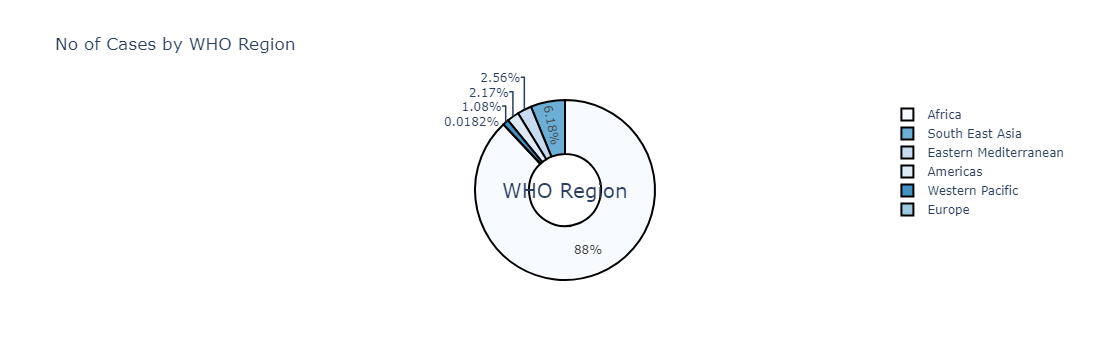

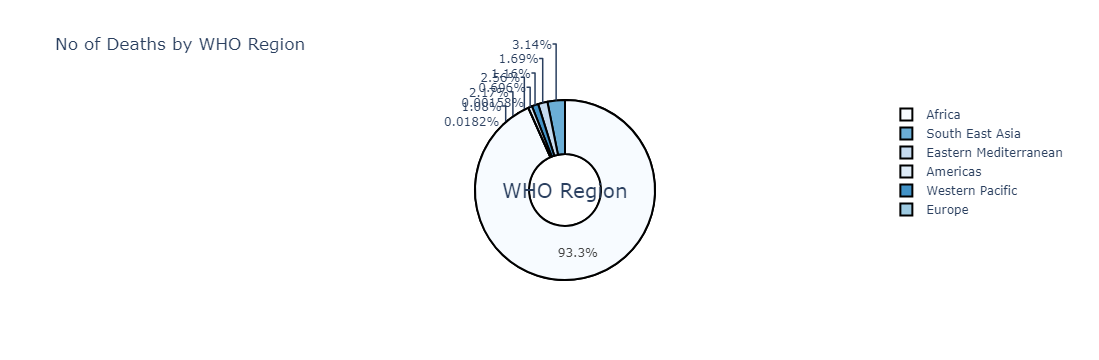

In [151]:
fig = go.Figure()

# Add pie trace
fig.add_trace(go.Pie(labels=who_region['who_region'], values=who_region['no_of_cases'], hole=0.4))

# Customize appearance
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='percent',
    marker=dict(colors=px.colors.sequential.Blues, line=dict(color='#000000', width=2))
)

# Update layout
fig.update_layout(
    title="No of Cases by WHO Region",
    annotations=[dict(text='WHO Region', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()



# Add pie trace
fig.add_trace(go.Pie(labels=who_region['who_region'], values=who_region['no_of_deaths'], hole=0.4))

# Customize appearance
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='percent',
    marker=dict(colors=px.colors.sequential.Blues, line=dict(color='#000000', width=2))
)

# Update layout
fig.update_layout(
    title="No of Deaths by WHO Region",
    annotations=[dict(text='WHO Region', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

#### Insight:
- Looking at the WHO regions, Africa has the highest number of cases and deaths, accounting for 88% and 93.3%, respectively. It is followed by South East Asia, while Europe has the lowest.

In [152]:
year=mal_rep.groupby("year")[["no_of_cases","no_of_deaths"]].sum().reset_index()
#year.style.background_gradient(cmap='Blues')
year.style.background_gradient(cmap='Blues')

,year,no_of_cases,no_of_deaths
0,2000,5279182,21419
1,2001,5534764,26162
2,2002,5335247,70683
3,2003,8243454,91247
4,2004,9389638,87926
5,2005,11170319,76842
6,2006,11898896,78995
7,2007,13365529,76904
8,2008,13395349,87024
9,2009,17454477,115694


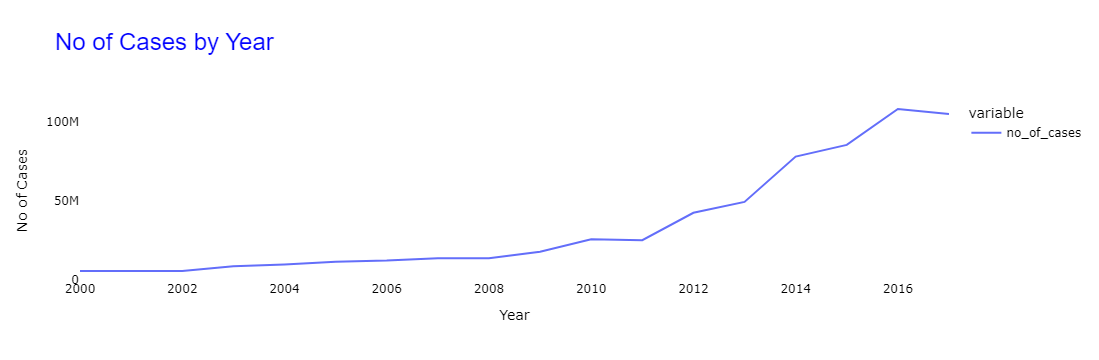

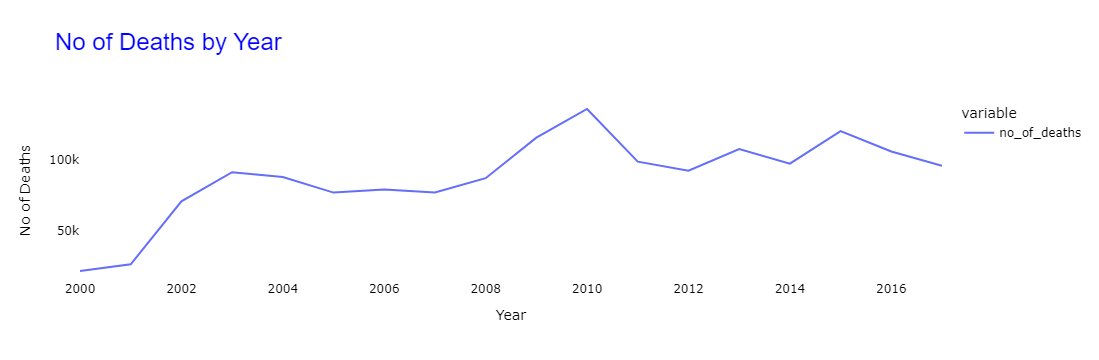

In [204]:
# Line plot
fig = px.line(year, y=['no_of_cases'], x='year', title='No of Cases by Year')

# Styling
fig.update_layout(
    title='No of Cases by Year',
    title_font=dict(size=24, color='blue', family="Arial"),
    xaxis_title="Year",
    yaxis_title="No of Cases",
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='black'),
    hovermode='x unified'
)

fig.show()


# Line plot
fig = px.line(year, y=["no_of_deaths"], x='year', title='No of Deaths by Year')

# Styling
fig.update_layout(
    title='No of Deaths by Year',
    title_font=dict(size=24, color='blue', family="Arial"),
    xaxis_title="Year",
    yaxis_title="No of Deaths",
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='black'),
    hovermode='x unified'
)

fig.show()

#### Insight:
- In the year 2016, there were more confirmed cases than in any other year. The number of deaths was highest in 2010.

In [205]:
mal_rep.head(4)

,country,year,no_of_cases,no_of_deaths,who_region
0,Afghanistan,2017,161778,10,Eastern Mediterranean
1,Algeria,2017,0,0,Africa
2,Angola,2017,3874892,13967,Africa
3,Argentina,2017,0,1,Americas


## Focus on South East Asia Region

In [206]:
sea=mal_rep[mal_rep["who_region"]=="South East Asia"]
sea_country=sea.groupby("country")[["no_of_cases","no_of_deaths"]].sum().reset_index()
sea_country.style.highlight_max(axis=0, color='lightgreen')

,country,no_of_cases,no_of_deaths
0,Bangladesh,722954,4252
1,Bhutan,31428,85
2,India,27013448,15218
3,Indonesia,4555866,5531
4,Myanmar,4637938,21324
5,Nepal,66449,93
6,Sri Lanka,336642,166
7,Thailand,594127,2702
8,Timor-Leste,346397,431


In [207]:
sea_country.style.bar(subset=['no_of_cases', 'no_of_deaths'], color='lightblue')

,country,no_of_cases,no_of_deaths
0,Bangladesh,722954,4252
1,Bhutan,31428,85
2,India,27013448,15218
3,Indonesia,4555866,5531
4,Myanmar,4637938,21324
5,Nepal,66449,93
6,Sri Lanka,336642,166
7,Thailand,594127,2702
8,Timor-Leste,346397,431


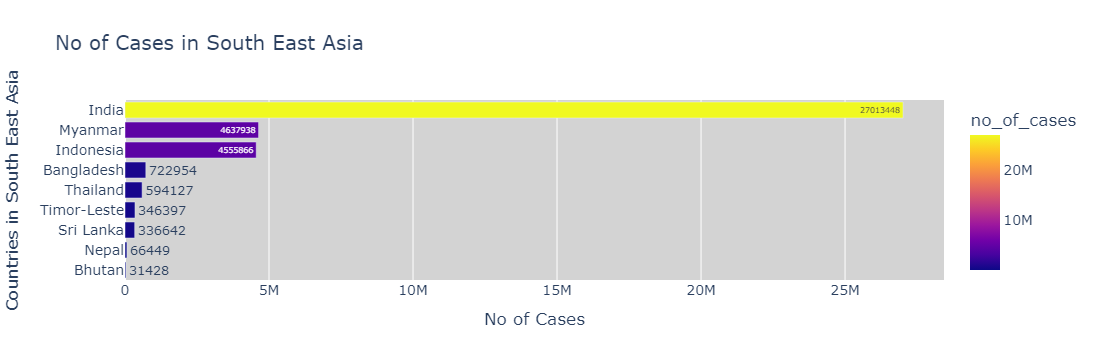

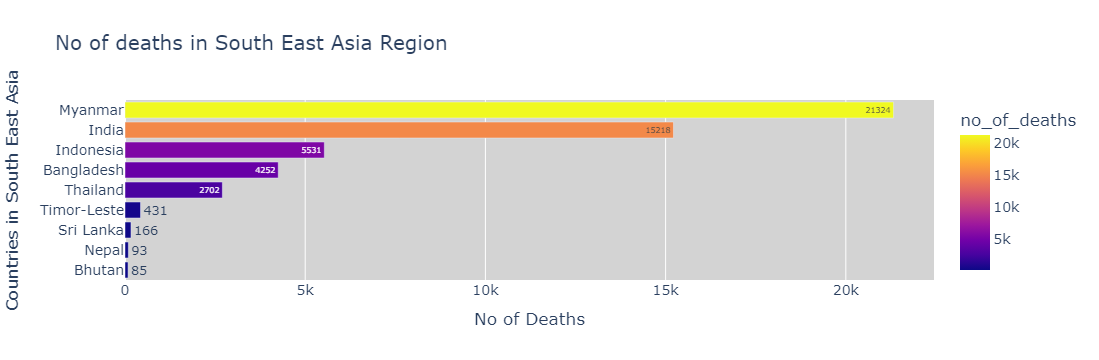

In [208]:
fig = px.bar(sea_country.sort_values(ascending=False, by="no_of_cases")[::-1], y="country", x='no_of_cases', title="No of Cases in South East Asia Region", 
             color='no_of_cases', text='no_of_cases')

# Customize the layout
fig.update_layout(
    title="No of Cases in South East Asia",
    xaxis_title="No of Cases",
    yaxis_title="Countries in South East Asia",
    font=dict(size=14),
    showlegend=False,
    hoverlabel=dict(font_size=16),
    plot_bgcolor='lightgray'
)

fig.show()


fig = px.bar(sea_country.sort_values(ascending=False, by="no_of_deaths")[::-1], y="country", x='no_of_deaths', title="No of Cases in South East Asia Region", 
             color='no_of_deaths', text='no_of_deaths')

# Customize the layout
fig.update_layout(
    title="No of deaths in South East Asia Region",
    xaxis_title="No of Deaths",
    yaxis_title="Countries in South East Asia",
    font=dict(size=14),
    showlegend=False,
    hoverlabel=dict(font_size=16),
    plot_bgcolor='lightgray'
)

fig.show()

#### Insight:
- In the South East Asia region, Myanmar has the highest number of deaths, followed by India. India has the highest number of confirmed cases, followed by Myanmar.

In [209]:
sea=mal_rep[mal_rep["who_region"]=="South East Asia"]
sea_year=sea.groupby("year")[["no_of_cases","no_of_deaths"]].sum().reset_index()
sea_year.style.background_gradient(axis=0, cmap='Reds')

,year,no_of_cases,no_of_deaths
0,2000,2747619,5482
1,2001,2452630,4790
2,2002,2181819,4610
3,2003,2162764,4283
4,2004,2508402,4254
5,2005,2549140,3506
6,2006,2444252,4588
7,2007,2035354,2963
8,2008,2494298,3101
9,2009,2417833,3198


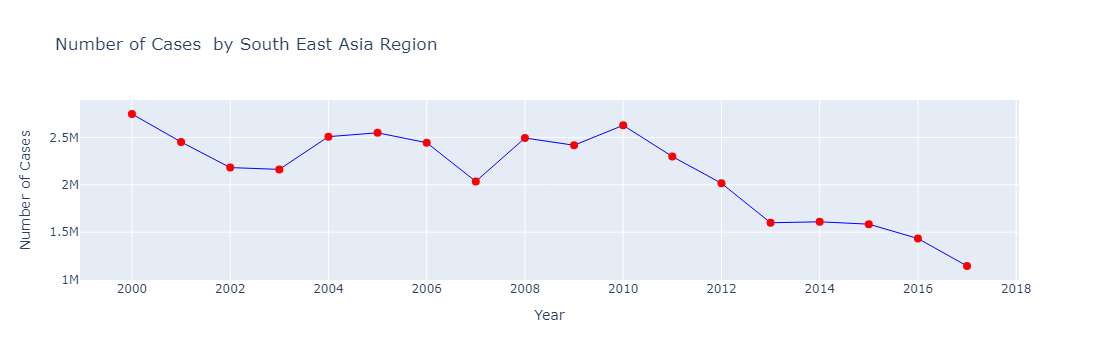

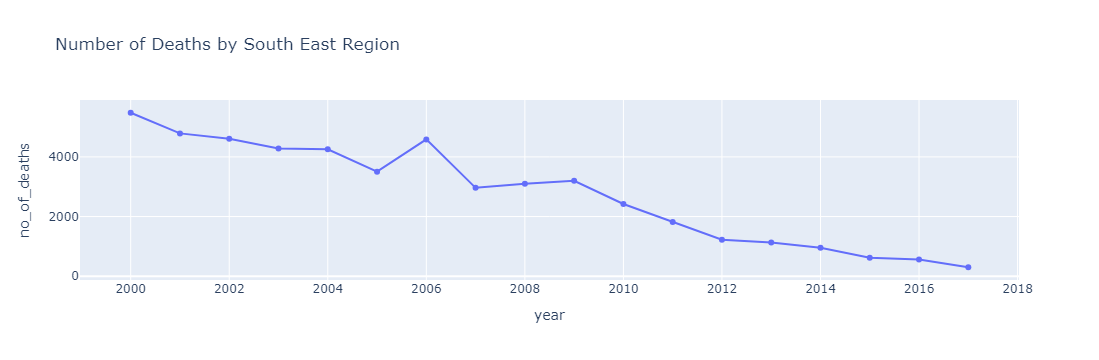

In [231]:
fig = go.Figure()

# Add trace for no_of_cases
fig.add_trace(go.Scatter(x=sea_year['year'], y=sea_year['no_of_cases'],
                         mode='lines+markers',
                         name='No of Cases',
                         line=dict(color='blue', width=1),
                         marker=dict(size=8, color='red')))
fig.update_layout(
    title='Number of Cases  by South East Asia Region',
    xaxis_title='Year',
    yaxis_title='Number of Cases'
    )
fig.show()



fig=px.line(sea_year,x="year",y="no_of_deaths",markers=True,title="Number of Deaths by South East Region")
fig.show()

#### Insight:
- The number of deaths and confirmed cases appeared in the year 2000. One thing is clear from the graph: there is a downward trend in both cases and deaths. There has been improvement in the South East region regarding malaria.

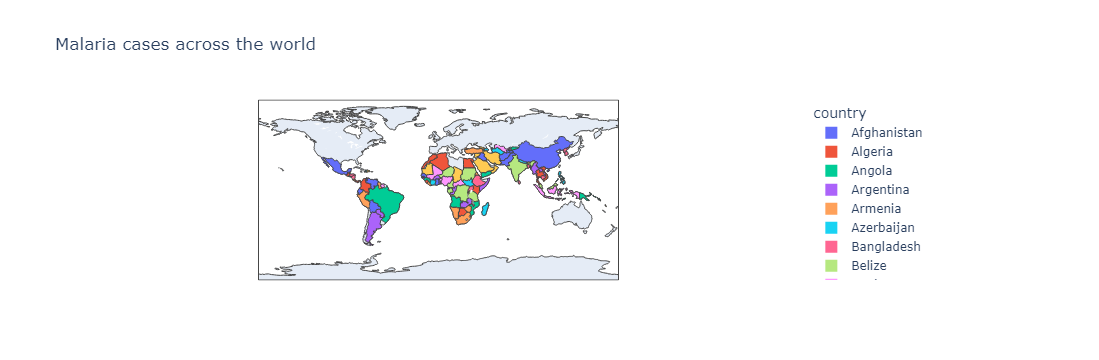

In [165]:
fig = px.choropleth(country,locationmode="country names",
                    locations ="country",
                    hover_data =['no_of_cases',"no_of_deaths","country"],
                    hover_name = 'country',
                    color = 'country',
                    title = 'Malaria cases across the world')

fig.show()

In [166]:
def plot_treemap_cases(dataframe,variable,value):
    fig = px.treemap(dataframe.sort_values(by=value,ascending=False).reset_index(drop=True),
                     path=[variable],values=value,title=("Highest number of Cases from 2000 to 2018 according to" + str(variable) + "<br>"),
                     color_discrete_sequence = px.colors.qualitative.Set1)
    fig.data[0].textinfo = 'label+text+value'
    
    fig.show()
    
def plot_treemap_deaths(dataframe,variable,value):
    fig = px.treemap(dataframe.sort_values(by=value,ascending=False).reset_index(drop=True),
                     path=[variable],values=value,title=("Highest number of Death Cases from 2000 to 2018 according to" + str(variable) + "<br>"),
                     color_discrete_sequence = px.colors.qualitative.Set1)
    fig.data[0].textinfo = 'label+text+value'
    
    fig.show()

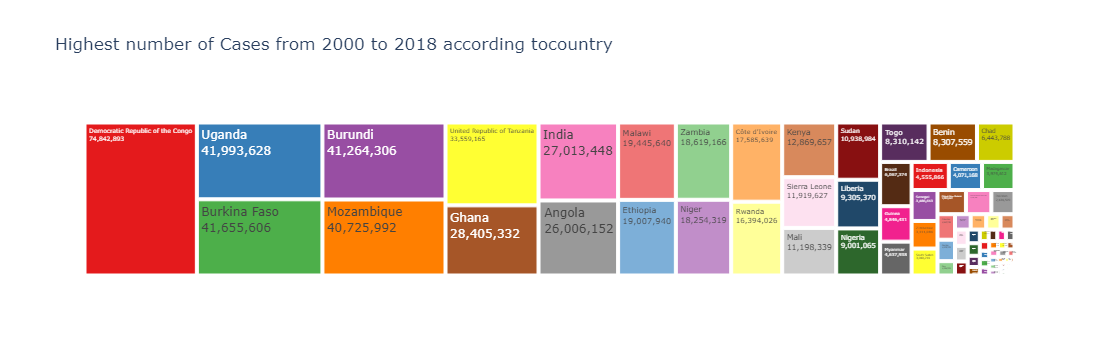

In [169]:
plot_treemap_cases(mal_rep,"country","no_of_cases")

In [161]:
mal_rep.head(5)

,country,year,no_of_cases,no_of_deaths,who_region
0,Afghanistan,2017,161778,10,Eastern Mediterranean
1,Algeria,2017,0,0,Africa
2,Angola,2017,3874892,13967,Africa
3,Argentina,2017,0,1,Americas
6,Bangladesh,2017,4893,13,South East Asia


In [162]:
afr=mal_rep[mal_rep["who_region"]=="Africa"]
afr_country=afr.groupby("country")[["no_of_cases","no_of_deaths"]].sum().reset_index()
afr_country.style.highlight_max(axis=0, color='lightgreen')

,country,no_of_cases,no_of_deaths
0,Algeria,1044,4
1,Angola,26006152,125364
2,Benin,8307559,14790
3,Botswana,18123,237
4,Burkina Faso,41655606,89211
5,Burundi,41264306,33484
6,Cabo Verde,1143,32
7,Cameroon,4071168,17431
8,Central African Republic,2676366,14141
9,Chad,6443788,18243
